# 3 Project II (second delivery)

This implementation is from group 11, composed by:

- Carolina Vitorino 86394
- João Barata 86450
- Tiago Mesquita 86520


This Notebook showcases the functional part of the second delivery. In each section we  present the function and a set of outputs. After each funtion we will mention the structure and the meaning of each input and output. Alternatively, you can include a standard function signature


In [1]:
%%javascript
// IPython.OutputArea.auto_scroll_threshold = 9999;

## 3.1 Clustering approach: organizing collections

In [58]:
import clustering as clg

Directory "rcv1" already exists, no extraction needed.


READING QRELS       : 100%|██████████| 37556/37556 [00:00<00:00, 766444.86it/s]



PARSING TRAIN SET...
rcv1_eval_train.json found, loading them...




PARSING TEST SET...
rcv1_eval_test.json found, loading them...
Init: 0.00s
TFIDF: 0.22s
[1000, 19917]
testing Kmeans ... with 10 clusters
Initialization complete
Iteration  0, inertia 1518.611
Iteration  1, inertia 836.654
Iteration  2, inertia 824.015
Iteration  3, inertia 817.394
Iteration  4, inertia 815.972
Iteration  5, inertia 814.827
Iteration  6, inertia 814.499
Iteration  7, inertia 814.287
Iteration  8, inertia 814.185
Iteration  9, inertia 814.093
Iteration 10, inertia 813.988
Iteration 11, inertia 813.968
Converged at iteration 11: center shift 0.000000e+00 within tolerance 4.431942e-09
Initialization complete
Iteration  0, inertia 1501.893
Iteration  1, inertia 829.171
Iteration  2, inertia 820.307
Iteration  3, inertia 816.766
Iteration  4, inertia 815.299
Iteration  5, inertia 815.000
Iteration  6, inertia 814.385
Iteration  7, inertia 814.033
Iteration  8, inertia 813.862
Iteration  9, inertia 813.711
Iteration 10, inertia 813.489
Iteration 11, inertia 813.249
Iterati

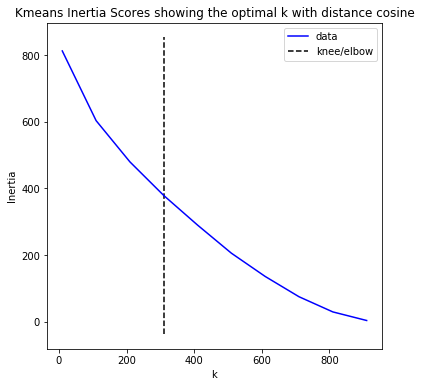

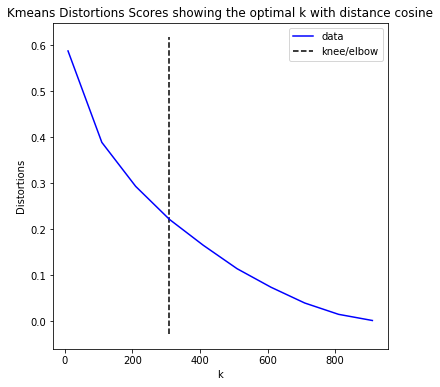

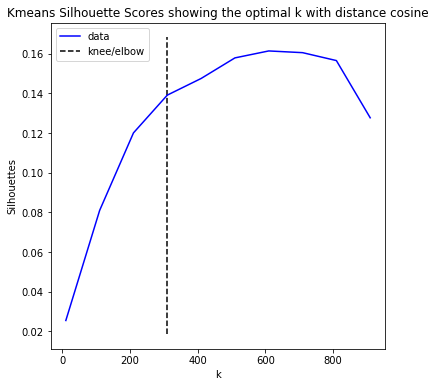

Optimal K is: 310
Initialization complete
Iteration  0, inertia 665.248
Iteration  1, inertia 383.151
Iteration  2, inertia 382.641
Converged at iteration 2: center shift 0.000000e+00 within tolerance 4.431942e-09
Initialization complete
Iteration  0, inertia 665.485
Iteration  1, inertia 379.302
Iteration  2, inertia 378.925
Converged at iteration 2: center shift 0.000000e+00 within tolerance 4.431942e-09
cluster output: [(0, array([728], dtype=int64)), (1, array([482], dtype=int64)), (2, array([61, 62, 63, 64, 71, 72], dtype=int64)), (3, array([685, 686, 687, 690, 694, 695, 696, 705, 710], dtype=int64)), (4, array([551, 682, 822, 823, 849], dtype=int64)), (5, array([239, 240, 245, 247], dtype=int64)), (6, array([613, 618, 619], dtype=int64)), (7, array([ 35,  49, 106, 270, 276, 566], dtype=int64)), (8, array([103, 108, 274, 571, 756], dtype=int64)), (9, array([214, 380, 383, 581], dtype=int64)), (10, array([  7,  17,  25,  83,  84,  87,  92,  93,  94,  95,  96,  97,  98,
       101, 

0

In [59]:
#(a)

#clustering(D,args)


clg.FUNCTIONALITY = 'a'
clg.main()

__@input:__

__D__: *dict* w/ structure:

    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }

    
__args:__
* __approach__: *Agglomerative* or *Kmeans*
* __distance__: *cosine* or *euclidean* or *manhattan* (...)


__@output:__

    list of clusters, each entry is a cluster cha-
racterized by the pair (centroid, set of document/topic identifiers)

In [ ]:
#(b)

#interpret(cluster,D,args)

__@input:__

__D__: *dict* w/ structure:

    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }

    
__args:__



__@output:__
    dictionary with cluster description

In [ ]:
#(c) 

#evaluate(D,args)

__@input:__

__D__: *dict* w/ structure:

    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }

    
__args:__



__@output:__
    clustering criteria

## 3.2 Supervised approach: incorporating relevance feedback

Directory "rcv1" already exists, no extraction needed.


READING QRELS       : 100%|██████████| 37556/37556 [00:00<00:00, 1028972.48it/s]



PARSING TRAIN SET...
rcv1_eval_train.json found, loading them...


PARSING TEST SET...
rcv1_eval_test.json found, loading them...



Evaluating models with preprocessing: stemming_stopwords...


C:\Users\Tiago\OneDrive - Universidade de Lisboa\IST\PRI\repo\PRI\project\main.py:116: UserWarning: Skiping indexing, errors will be thrown if checkpoints don't exist
  warnings.warn("Skiping indexing, errors will be thrown if checkpoints don't exist")


Indexing time:      0.000s, Indexing space:     87.039mb

Evaluating model with scoring: BM25_k1_2,00_b_1,00...
Retrieval results already exist, loading from file ("retrieval_results/test_stemming_stopwords_tfidf.json")...
Ranking results already exist, loading from file ("ranking_results/test_stemming_stopwords_BM25_k1_2,00_b_1,00.json")...


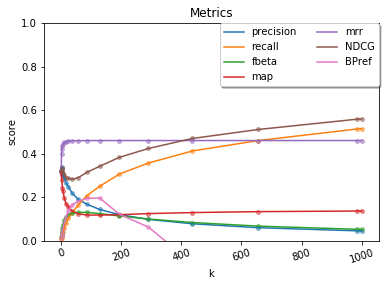

In [15]:
# SETUP
import classifier as cls

cls.docs, cls.topics, cls.topic_index, cls.doc_index = cls.setup() # setps up the necessary data in the classifier module
docs, topics, topic_index, doc_index = cls.docs, cls.topics, cls.topic_index, cls.doc_index

# loads baselines from the 1st project 
p1.topics = cls.topics
try:
    p1_results = p1.evaluation(topics, (doc_index['p'], doc_index['n']), ('test', docs['test']), (p1.stem_analyzer,), (p1.NamedBM25F(K1=2, B=1),), 'tfidf', skip_indexing=True)
except Exception as e:
    p1_results = p1.evaluation(topics, (doc_index['p'], doc_index['n']), ('test', docs['test']), (p1.stem_analyzer,), (p1.NamedBM25F(K1=2, B=1),), 'tfidf', skip_indexing=False)

p1_ranking = list(p1_results[0].values())[0]
p1_retrieval = list(p1_results[1].values())[0]

In [28]:
#(a)

#training(q,D_train ,R_train ,args)
q = list(topics)[1] # topics is a dict
print('q:', q)

model = cls.training(q, docs['train'], topic_index, classifier=cls.knn_classifier, vectorizer=cls.tfidf_vectorizer)
print('model:', model)

q: R102
model: <classifier.SparseVectorClassifier object at 0x000002A71AAAE288>


__@input:__

__q__ = string representing topic q

__Dtrain__: *dict* w/ structure:

    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }
__Rtrain__ is a tuple with 2 dicts,: ({doc_id: ['p'], ...}, {doc_id: ['n'], ...}), 'p'represents the relevant and 'n' the non relevant
    
__args:__
* __classifier__: *MLP* or *KNN* or *MnB* and their respective tuned counterparts;
* __vectorizer__: *TFIDF* or *TF* or *IDF* or *BM25* 


__@output:__

    q-conditional classification model

In [46]:
#(b)

#classify(d,q ,M ,args)

sub_docs = cls.get_subset(docs["test"], topic_index['p'].get(q, [])) # sub docs dict with docs for topic q
d_id, document = list(sub_docs.items())[0]
print('document:', d_id, document)

score = cls.classify(document, q, model)
print('score:', score)


document: 88903 {'headline': 'Justice on trial in Belgian child sex scandal.', 'p': 'Belgian justice went on trial on Tuesday as commentators reacted against a move by the lawyer defending chief child sex scandal suspect Marc Dutroux to get the investigating magistrate thrown off the case.Lawyer Julien Pierre has formally asked for magistrate Jean-Marc Connerotte to be removed on the grounds of bias because he did not pay for a dinner he was invited to by a support group for the parents of missing and murdered children."This manoeuvre is simply a new example of justice being taken hostage by the misuse of the legal means put at the disposal of the defence," Jean-Pierre Malmendier of the Marc et Corinne support group, said. The group was named after two children who were abducted and killed in the late 1980s."Isn\'t it more important to establish the rights of the victims?" he asked Belgian media.Malmendier accepted that Connerotte and public prosecutor Michel Bourlet had not paid for t

__@input:__

__d__ = string represents a document ID from Dtest

__q__ = string representing topic q

__M__: q-conditional classification model

__Rtrain__ is a tuple with 2 dicts,: ({doc_id: ['p'], ...}, {doc_id: ['n'], ...}), 'p'represents the relevant and 'n' the non relevant
    
__args:__



__@output:__

    probabilistic classification output on the relevance of document d to the
topic q


Classifying with classifier: KNN, and vectorizer: TF-IDF:
Classification results already exist, loading from file ("classification_results/eval_knn_tf-idf.json")...
Reranking results already exist, loading from file ("reranking_results/eval_knn_tf-idf.json")...


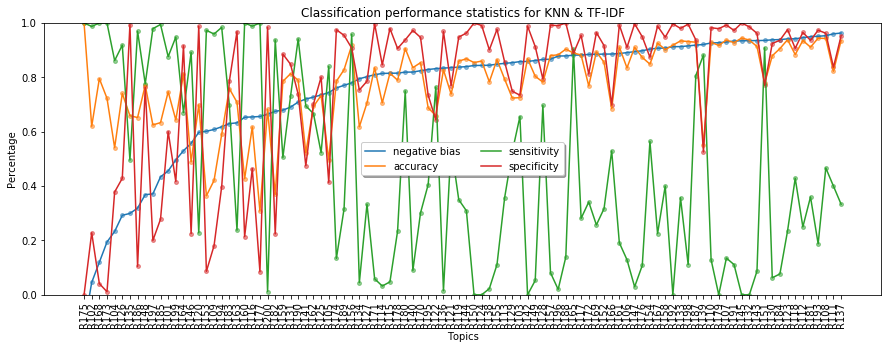

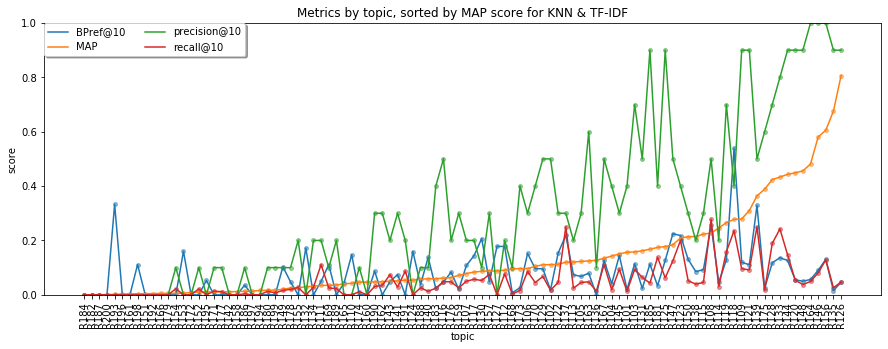

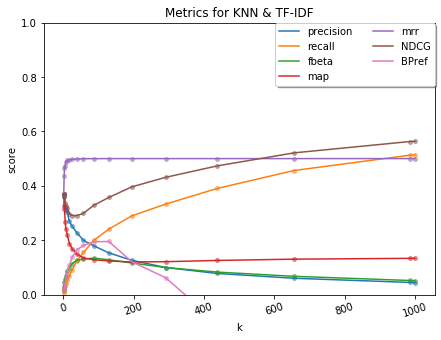


Classifying with classifier: MLP, and vectorizer: TF-IDF:
Classification results already exist, loading from file ("classification_results/eval_mlp_tf-idf.json")...
Reranking results already exist, loading from file ("reranking_results/eval_mlp_tf-idf.json")...


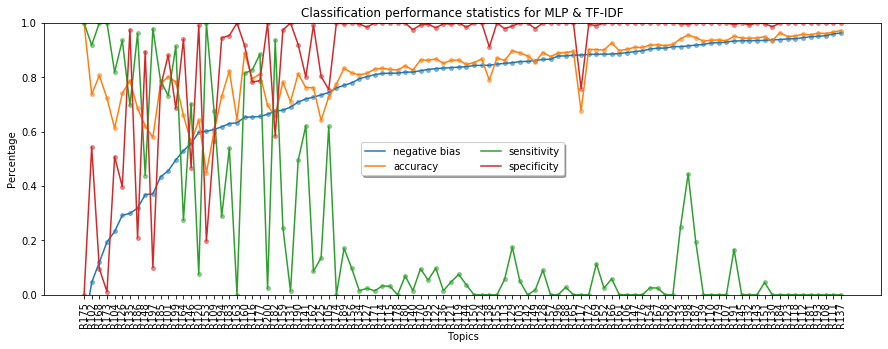

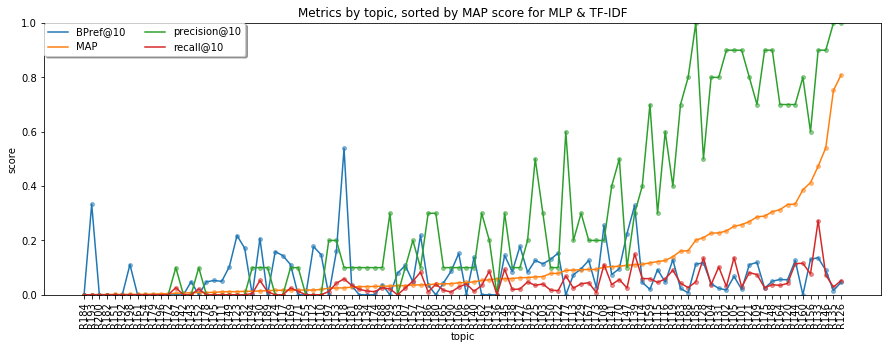

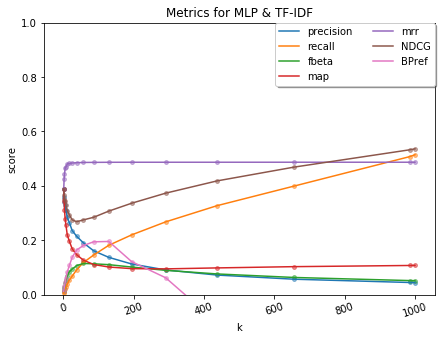

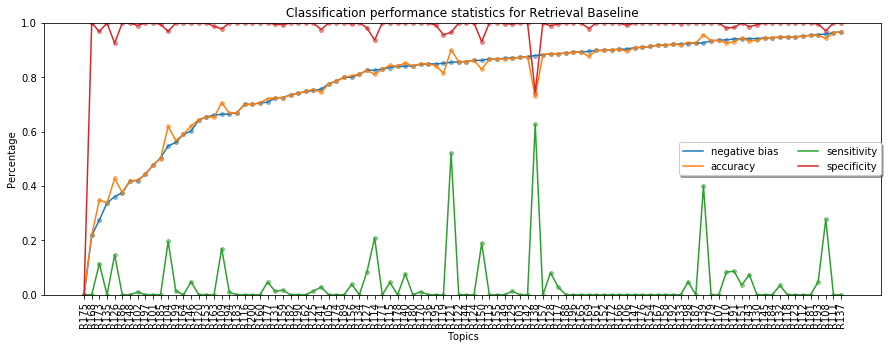

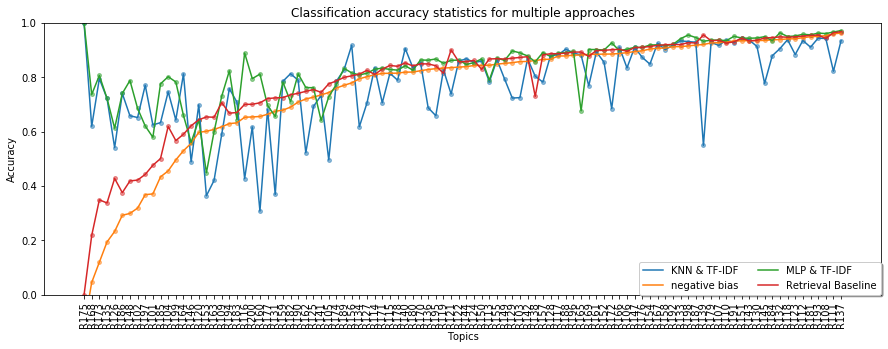

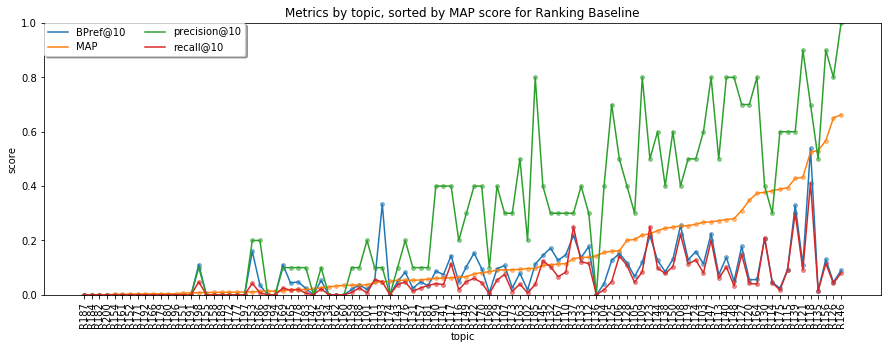

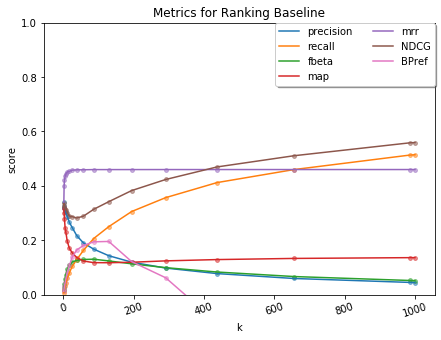

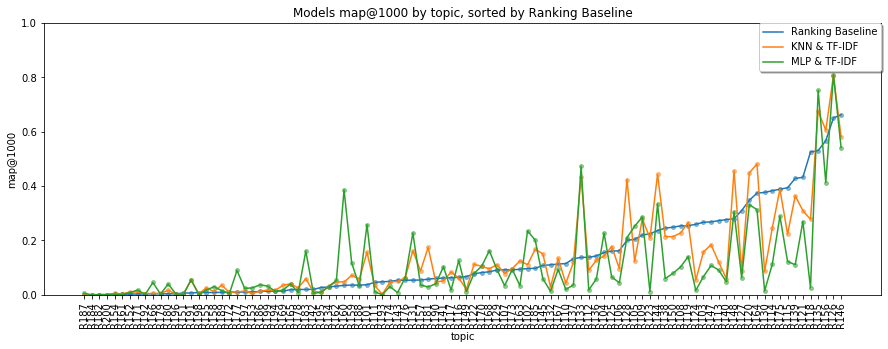

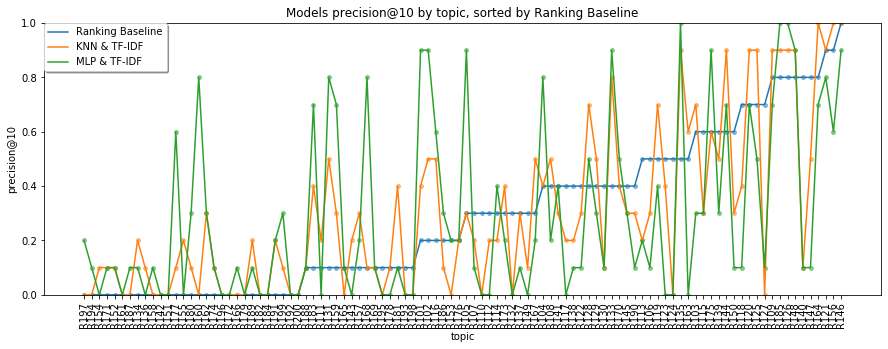

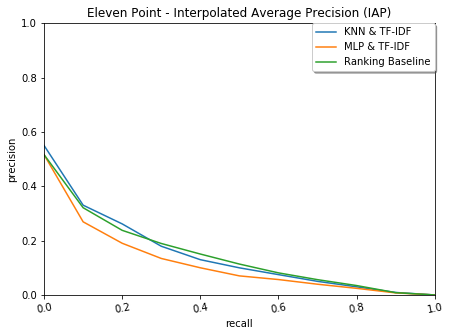

In [52]:
#(c)

#evaluate(d,q ,M ,args)

out = cls.evaluate(topics, docs['test'], topic_index, models=((cls.tfidf_vectorizer, cls.knn_classifier),(cls.tfidf_vectorizer, cls.mlp_classifier)), ranking_results=p1_ranking, retrieval_results=p1_retrieval)

__@input:__

__Qtest__ is a list of topic ids

__Rtest__ is a tuple with 2 dicts,: ({doc_id: ['p'], ...}, {doc_id: ['n'], ...})

__Dtest__ is a *dict* with structure:
    
    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }


__Rtrain__ is a tuple with 2 dicts,: ({doc_id: ['p'], ...}, {doc_id: ['n'], ...}), 'p'represents the relevant and 'n' the non relevant
    
__args:__:

* __models__: *(vectorizer,classifier)* where vectorizer can be any of the mentioned above and the same applies to the classifier


__@output__

performance statistics regarding the underlying classification system and
the behavior of the aided IR system

## 3.3 Graph ranking approach: document centrality

In [2]:
import graphIR as graph

#(a)

#build_graph(D,sim,$\theta$,args) (your implementation)

graph.FUNCTIONALITY = 'a'
graph.main()

#graph = build_graph(docs['test'], sim=cosine_similarity, th=THRESHOLD)
#print("graph nodes:", graph.nodes)

Directory "rcv1" already exists, no extraction needed.


[nltk_data] Downloading package wordnet to C:\Users\Tiago
[nltk_data]     Mesquita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
READING QRELS       : 100%|██████████| 37556/37556 [00:00<00:00, 1121092.05it/s]




PARSING TRAIN SET...
rcv1_eval_train.json found, loading them...


PARSING TEST SET...
rcv1_eval_test.json found, loading them...
Classification results already exist, loading from file ("classification_results/eval_mlp_tf-idf.json")...
graph nodes: ['105780', '106287', '106455', '110886', '117182', '119150', '120390', '120406', '121043', '124025', '124921', '125475', '133961', '134445', '151221', '152376', '154699', '154700', '154738', '154758', '155488', '155528', '155548', '155572', '166939', '167306', '169979', '170614', '177044', '177049', '177059', '177087', '177089', '177290', '177319', '177364', '177644', '177661', '177662', '177664', '186737', '197112', '197235', '197777', '197943', '203547', '203698', '210140', '210339', '213148', '213174', '213257', '213507', '214554', '215234', '215314', '216068', '217359', '217627', '217898', '218339', '221116', '221126', '221237', '221267', '221364', '221378', '221968', '221983', '222022', '222027', '222908', '223076', '223082', '223421

__@input:__

__D__: *dict* w/ structure:

    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }

__args:__
* __similarity__: *Cosine Similarity*;
* __theta__: *0.5*


__@output:__

**graph**: graph with nodes representing documents;

In [3]:
#(b)

#undirected_page_rank(q,I,k,args)

graph.FUNCTIONALITY = 'b'
graph.TOPIC = 'R101'
graph.main()

#pr_values = undirected_page_rank(classification_results[TOPIC], D=docs['test'], p=10, sim=cosine_similarity,
                                             #th=threshold, priors = 'classification')
#print({TOPIC: pr_values})'''

Directory "rcv1" already exists, no extraction needed.


READING QRELS       : 100%|██████████| 37556/37556 [00:00<00:00, 1043228.74it/s]



PARSING TRAIN SET...
rcv1_eval_train.json found, loading them...


PARSING TEST SET...
rcv1_eval_test.json found, loading them...


Classification results already exist, loading from file ("classification_results/eval_mlp_tf-idf.json")...
{'R101': {'vanilla_pk': {'244000': 0.004334010124773836, '218339': 0.004243543838241799, '225231': 0.004188730351672025, '234473': 0.004158287975653182, '256001': 0.004103989839984717, '240223': 0.004098176551505671, '229439': 0.004096465736658956, '243773': 0.0040857245572182305, '197112': 0.004061262504890105, '228774': 0.004050468761291216}, 'extended_pk': {'244000': 0.006154582212365959, '218339': 0.006139063766001171, '225231': 0.005936980867377964, '214554': 0.005858344284742219, '243773': 0.005838171503637826, '243766': 0.005830932923590519, '197112': 0.005774247889795474, '225431': 0.005765325490590679, '256001': 0.00574961233667473, '234473': 0.005747846699621292}}}


__@input:__

__q__ is a string representing a document

__D__: *dict* w/ structure:

    {
        "itemid": {
            "headline": "(headline text)",
            "p": "(p text)",
            "dateline": "(dateline text)",
            "byline": "(byline text)"
        },
        ...
    }
    
__p__ is an integer representing the top-p documents retrieved & respective ranks

* __similarity__: *Cosine Similarity*;
    
* __theta__: *0.5*
    
__args__:

* 
__priors__: string representing the type of priors *classification* or *baseline*, where the classification priors represent the scores from the classifier of section 2 and the baseline represent a BM25 normalized ranking score from first delivery.

__@output__: dictionary with 2 keys *vanilla* and *extended_pk*, with the top-p scores for each key.

Further functionalities to answer the report questions:

- #### Graph

- Question a)

Directory "rcv1" already exists, no extraction needed.


READING QRELS       : 100%|██████████| 37556/37556 [00:00<00:00, 1088553.29it/s]



PARSING TRAIN SET...
rcv1_eval_train.json found, loading them...


PARSING TEST SET...
rcv1_eval_test.json found, loading them...


Classification results already exist, loading from file ("classification_results/eval_mlp_tf-idf.json")...

Evaluating models with preprocessing: stemming_stopwords...


C:\Users\Tiago\OneDrive - Universidade de Lisboa\IST\PRI\repo\PRI\project\main.py:116: UserWarning: Skiping indexing, errors will be thrown if checkpoints don't exist
  warnings.warn("Skiping indexing, errors will be thrown if checkpoints don't exist")


Indexing time:      0.001s, Indexing space:     87.039mb

Evaluating model with scoring: BM25_k1_2,00_b_1,00...
Ranking results already exist, loading from file ("ranking_results/test_stemming_stopwords_BM25_k1_2,00_b_1,00.json")...


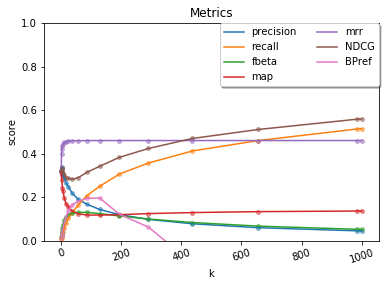

CLASSIFYING R101    :   0%|          | 0/100 [00:00<?, ?it/s]

Retrieval results don't exist, retrieving with model...


CLASSIFYING R101    :   0%|          | 0/100 [00:00<?, ?it/s]          

Retrieval results don't exist, retrieving with model...


CLASSIFYING R153    :  52%|█████▏    | 52/100 [00:51<00:46,  1.03it/s]

In [ ]:
import main as p1

graph.QUESTION = 'a'
graph.FUNCTIONALITY = None
graph.main()

#compare_graph_to_baseline(docs['test'], topics, topic_index, threshold, priors = 'baseline')
#
#        graph_results_vanilla = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                               type='vanilla', threshold = threshold, priors = 'baseline')
#
#        graph_results_extended = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                               type='extended', threshold=threshold, priors='baseline')
#
#        plot_statistics_for_graph(graph_results_vanilla, pk_type='Vanilla')
#        plot_statistics_for_graph(graph_results_extended, pk_type='Personalized')

- Question b)

In [ ]:
graph.QUESTION = 'b'
graph.FUNCTIONALITY = None
graph.main()


# th_variation_no_priors = plot_variation_threshold(classification_results, docs['test'], topics, topic_index,
#                                                  pk_type='vanilla', priors = 'classification')
#
#        th_variation_priors = plot_variation_threshold(classification_results, docs['test'], topics, topic_index,
#                                                pk_type='extended_pk', priors= 'classification')
#
#        plot_iap_for_models(th_variation_no_priors)
#        plot_iap_for_models(th_variation_priors)



- Question c) 

In [ ]:
graph.QUESTION = 'c'
graph.FUNCTIONALITY = None
graph.main()


# print("Question c: \n")
#        plot_avg_centrality(docs['test'], sim=cosine_similarity, th=THRESHOLD)

- Question d)

In [ ]:
graph.QUESTION = 'd'
graph.FUNCTIONALITY = None
graph.main()

#   graph_results_vanilla = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                               type='vanilla', threshold=THRESHOLD, priors = 'baseline')
#        graph_results_personalized = get_pk_results(classification_results, docs['test'], topics, topic_index,
#                                                    type='extended', threshold=THRESHOLD, priors = 'baseline')
#        plot_iap_for_models({'vanilla': graph_results_vanilla, 'personalized': graph_results_personalized})
#